In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

In [2]:
def DFT_slow(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [3]:
A = 2.
f1 = 150
f2 = 50
T1 = 1/f1
T2 = 1/f2
N = 1_000
omega1 = 2 * np.pi / T1
omega2 = 2 * np.pi / T2

t = np.linspace(-0.05, 0.05, N)
x_cos = A * np.cos(omega1 * t) + A * np.cos(omega2 * t)

# a)

In [4]:
x_cos_DFT_slow = DFT_slow(x_cos)
x_cos_fft = np.fft.fft(x_cos)

%timeit DFT_slow(x_cos)
%timeit np.fft.fft(x_cos)
freqs = np.fft.fftfreq(t.size, d=t[1] - t[0])

139 ms ± 12.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
27 μs ± 991 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


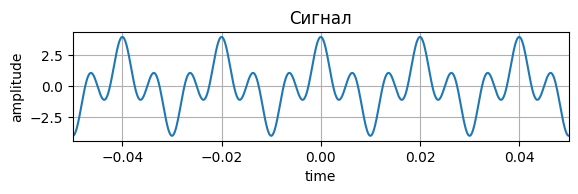

In [5]:
plt.subplot(3, 1, 1)
plt.plot(t, x_cos)
plt.title('Сигнал')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.xlim(-0.05, 0.05)
plt.grid(True)

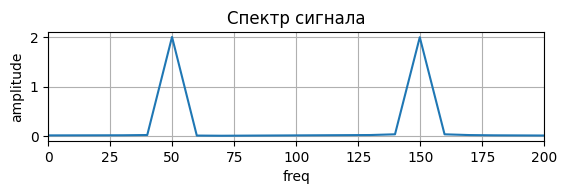

In [6]:
plt.subplot(3,1,1)
plt.plot(freqs[:len(freqs)//2], 2.0 / N * np.abs(x_cos_DFT_slow)[:len(freqs)//2])
plt.title('Спектр сигнала')
plt.xlabel('freq')
plt.ylabel('amplitude')
plt.xlim(0, 200)
plt.grid(True)

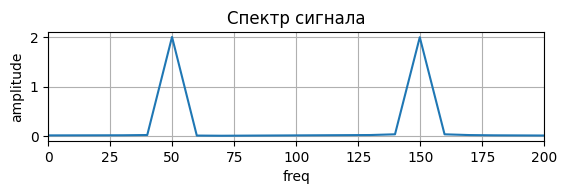

In [7]:
plt.subplot(3,1,1)
plt.plot(freqs[:len(freqs)//2], 2.0 / N * np.abs(x_cos_fft)[:len(freqs)//2])
plt.title('Спектр сигнала')
plt.xlabel('freq')
plt.ylabel('amplitude')
plt.xlim(0, 200)
plt.grid(True)

# б)

c:\Users\Ivan K\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Ivan K\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


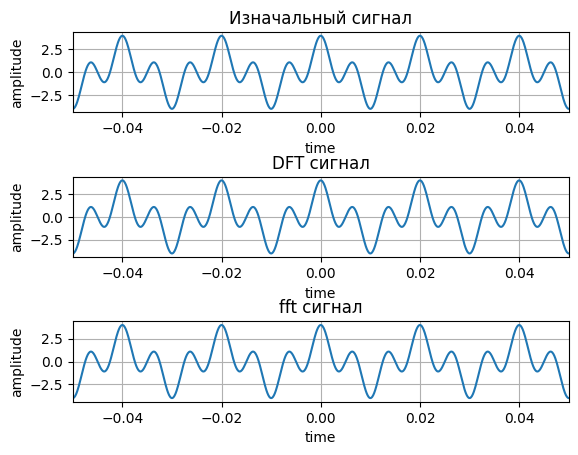

In [8]:
x_cos_DFT_ifft = np.fft.ifft(x_cos_DFT_slow)
x_cos_fft_ifft = np.fft.ifft(x_cos_fft)

plt.subplots_adjust(wspace=0.4, hspace=0.8)

plt.subplot(3,1,1)
plt.plot(t, x_cos)
plt.title('Изначальный сигнал')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.xlim(-0.05, 0.05)
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(t, x_cos_DFT_ifft)
plt.title('DFT сигнал')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.xlim(-0.05, 0.05)
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(t, x_cos_DFT_ifft)
plt.title('fft сигнал')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.xlim(-0.05, 0.05)
plt.grid(True)

# в)

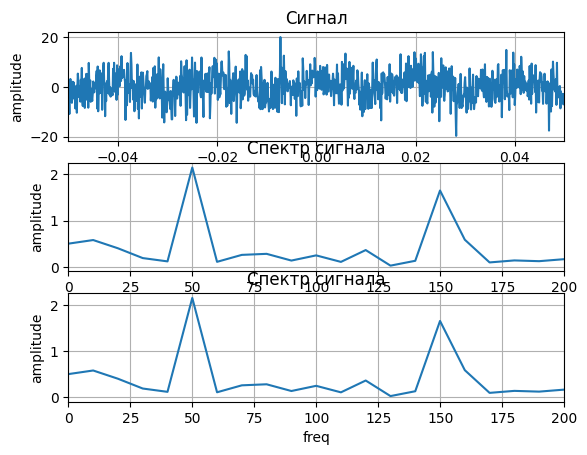

In [9]:
# При какой амплитуде шума спектр начинает изменяться
x_cos_noize = (A * np.cos(omega1 * t) + A * np.cos(omega2 * t)) + 5 * np.random.normal(0, 1, t.shape)
x_cos_DFT_slow_noize = DFT_slow(x_cos_noize)
x_cos_fft_noize = np.fft.fft(x_cos_noize)

plt.subplot(3, 1, 1)
plt.plot(t, x_cos_noize)
plt.title('Сигнал')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.xlim(-0.05, 0.05)
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(freqs[:len(freqs)//2], 2.0 / N * np.abs(x_cos_DFT_slow_noize)[:len(freqs)//2])
plt.title('Спектр сигнала')
plt.xlabel('freq')
plt.ylabel('amplitude')
plt.xlim(0, 200)
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(freqs[:len(freqs)//2], 2.0 / N * np.abs(x_cos_fft_noize)[:len(freqs)//2])
plt.title('Спектр сигнала')
plt.xlabel('freq')
plt.ylabel('amplitude')
plt.xlim(0, 200)
plt.grid(True)

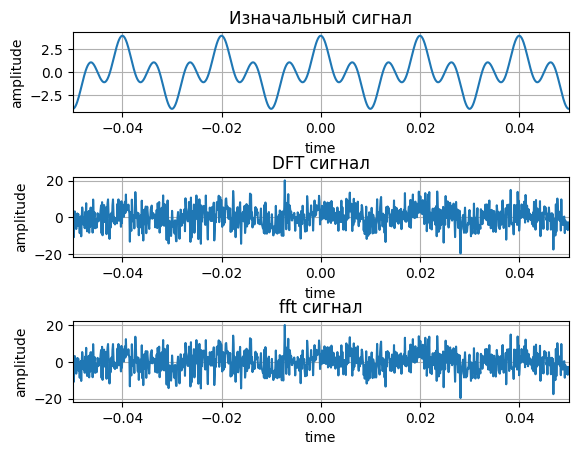

In [10]:
x_cos_DFT_ifft_noize = np.fft.ifft(x_cos_DFT_slow_noize)
x_cos_fft_ifft_noize = np.fft.ifft(x_cos_fft_noize)

plt.subplots_adjust(wspace=0.4, hspace=0.8)

plt.subplot(3,1,1)
plt.plot(t, x_cos)
plt.title('Изначальный сигнал')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.xlim(-0.05, 0.05)
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(t, x_cos_DFT_ifft_noize)
plt.title('DFT сигнал')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.xlim(-0.05, 0.05)
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(t, x_cos_DFT_ifft_noize)
plt.title('fft сигнал')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.xlim(-0.05, 0.05)
plt.grid(True)

# 2

In [11]:
def impulse(t, a=0.0, b=1.0, A=2):
    if a <= t % 2 <= b:
        return A
    return -2

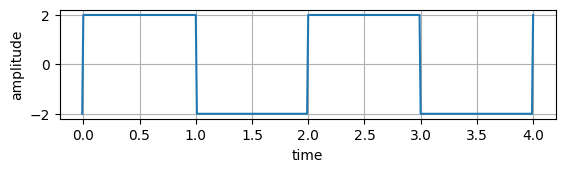

In [12]:
t = np.arange(-0.01, 4.01, 0.01)
x_impulse = np.array([impulse(ti) for ti in t])

plt.subplot(3,1,1)
plt.plot(t, x_impulse)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.grid(True)

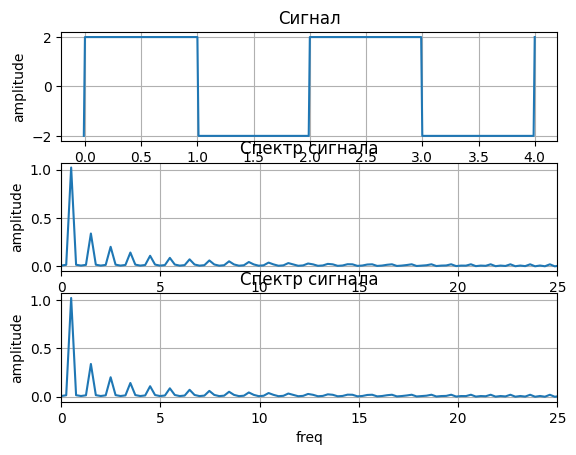

In [13]:
x_impulse_DFT_slow = DFT_slow(x_impulse)
x_impulse_fft = np.fft.fft(x_impulse)
freqs = np.fft.fftfreq(t.size, d=t[1] - t[0])

plt.subplot(3, 1, 1)
plt.plot(t, x_impulse)
plt.title('Сигнал')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(freqs[:len(freqs)//2], 2.0 / N * np.abs(x_impulse_DFT_slow)[:len(freqs)//2])
plt.title('Спектр сигнала')
plt.xlabel('freq')
plt.ylabel('amplitude')
plt.xlim(0, 25)
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(freqs[:len(freqs)//2], 2.0 / N * np.abs(x_impulse_fft)[:len(freqs)//2])
plt.title('Спектр сигнала')
plt.xlabel('freq')
plt.ylabel('amplitude')
plt.xlim(0, 25)
plt.grid(True)

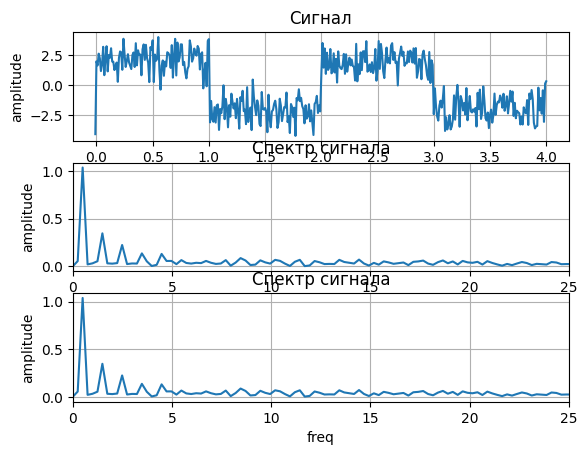

In [14]:
x_impulse_noize = x_impulse + np.random.normal(0, 1, t.shape)
x_impulse_DFT_slow_noize = DFT_slow(x_impulse_noize)
x_impulse_fft_noize = np.fft.fft(x_impulse_noize)
freqs = np.fft.fftfreq(t.size, d=t[1] - t[0])

plt.subplot(3, 1, 1)
plt.plot(t, x_impulse_noize)
plt.title('Сигнал')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(freqs[:len(freqs)//2], 2.0 / N * np.abs(x_impulse_DFT_slow_noize)[:len(freqs)//2])
plt.title('Спектр сигнала')
plt.xlabel('freq')
plt.ylabel('amplitude')
plt.xlim(0, 25)
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(freqs[:len(freqs)//2], 2.0 / N * np.abs(x_impulse_fft_noize)[:len(freqs)//2])
plt.title('Спектр сигнала')
plt.xlabel('freq')
plt.ylabel('amplitude')
plt.xlim(0, 25)
plt.grid(True)

# 3

In [15]:
import numpy as np

def my_fft(x):
    N = len(x)
    if N <= 1:
        return x
    else:
        even = my_fft(x[0::2])
        odd = my_fft(x[1::2])
        k = np.arange(N // 2)
        T = np.exp(-2j * np.pi * k / N) * odd
        return np.concatenate([even + T, even - T])
    
def pad_to_power_of_two(x):
    N = len(x)
    next_power_of_two = 1 << (N - 1).bit_length()
    print(N, next_power_of_two)
    return np.pad(x, (0, next_power_of_two - N), mode='constant')

In [19]:
A = 2.
f = 50
T = 1/f
N = 4096
t = np.linspace(0., 0.1, N)
omega = 2 * np.pi / T

x_cos = A * np.cos(omega * t)
%timeit np.fft.fft(x_cos)
%timeit my_fft(x_cos)
%timeit DFT_slow(x_cos)
x_cos_my_fft = my_fft((pad_to_power_of_two(x_cos)))
x_cos_fft = np.fft.fft((x_cos))
x_cos_slow_fft = DFT_slow(x_cos)
freqs = np.fft.fftfreq(t.size, d=t[1] - t[0])

103 μs ± 2.7 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
99.9 ms ± 1.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.26 s ± 46.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4096 4096


<Figure size 640x480 with 0 Axes>

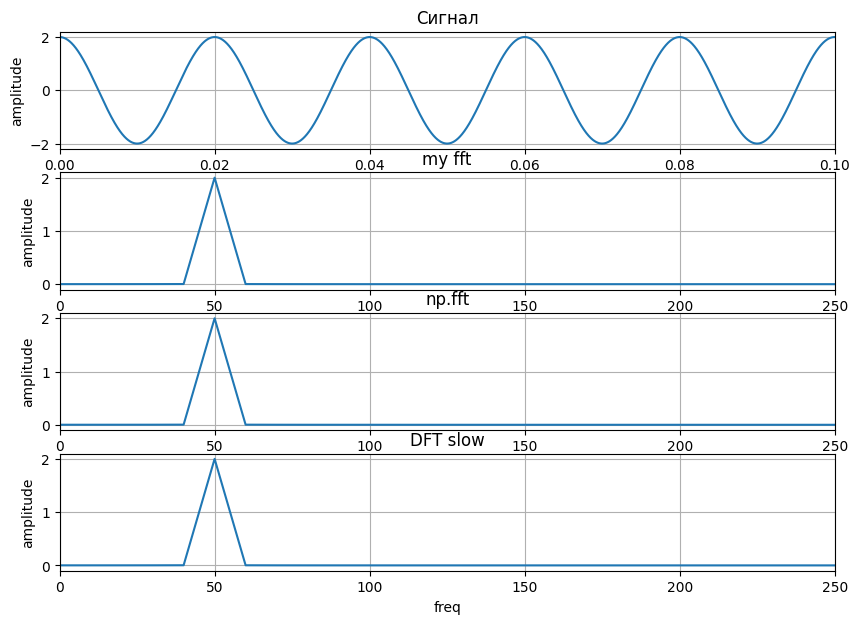

In [23]:
plt.subplots_adjust(wspace=0.4, hspace=0.8)
plt.figure(figsize=(10, 7))
plt.subplot(4, 1, 1)
plt.plot(t, x_cos[:t.shape[0]])
plt.title('Сигнал')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.xlim(0., 0.1)
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(freqs[:len(freqs)//2], 2.0 / N * np.abs(x_cos_my_fft)[:len(freqs)//2])
plt.title('my fft')
plt.xlabel('freq')
plt.ylabel('amplitude')
plt.xlim(0, 250)
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(freqs[:len(freqs)//2], 2.0 / N * np.abs(x_cos_fft)[:len(freqs)//2])
plt.title('np.fft')
plt.xlabel('freq')
plt.ylabel('amplitude')
plt.xlim(0, 250)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(freqs[:len(freqs)//2], 2.0 / N * np.abs(x_cos_slow_fft)[:len(freqs)//2])
plt.title('DFT slow')
plt.xlabel('freq')
plt.ylabel('amplitude')
plt.xlim(0, 250)
plt.grid(True)